In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Optional

In [3]:
A = np.ones([5, 5])
A[3, 2] = 100
A
# np.argsort(A)
xs, ys = np.where(A == 100)
print(xs)
print(ys)
print(xs[0])

[3]
[2]
3


In [9]:
head_value = 1000000000000000
head_value = 100

def start_board():
    b = np.zeros([5, 5])

    # b = np.zeros([10, 8])
    # b = np.zeros([30, 30])

    b[2, 2] = head_value
     # b[5, 3] = head_value


    
    return b

board = start_board()
board[2, 3] = 999
# board[2, 0] = 999
# reward = update_board(board, 0)
print(board)
# print(reward)

[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0. 100. 999.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


In [10]:
np.where(board == food_value)

(array([2]), array([3]))

In [11]:
food_value = 999
chance_refood_pos = 0.8



                
def update_board(board:np.array, directionToGo:int):
    def clear_food_on_board():
        ys, xs = np.where(board == food_value)
        for y, x in zip(ys, xs):
            board[y, x] = 0

    # def isFoundFood(x, y):
    #     return (board[y, x] == food_value)

    def set_new_food_on_board():
        clear_food_on_board()
        x = np.random.randint(0, board.shape[1])
        y = np.random.randint(0, board.shape[0])
        if board[y, x] == head_value:
            set_new_food_on_board()
            return
            # return
        board[y, x] = food_value

    if (np.random.rand() < chance_refood_pos):
        set_new_food_on_board()
    # global end_game
    local_end = False
    # 0,1,2,3 -> r,t,l,b
    # try:
    # print(board)
    # yx, xs = np.where(board == 100)
    # print("xs ys : ", xs, ys)
    # xhead = xs[0]
    # yhead = ys[0]
    # print(f"old head is at [{},{xhead}]")
    # xys = np.where(board == head_value)
    # if xys.shape
    xhead = np.where(board == head_value)[1][0]
    yhead = np.where(board == head_value)[0][0]

    
    board[yhead, xhead] = 0
    # board[xhead, yhead] = 0
    # print(np.argmax(board))
    # print(np.where(board == 100))


    if (directionToGo == 0):
        xhead += 1
        ...
    elif (directionToGo == 1):
        yhead -= 1
    elif (directionToGo == 2):
        xhead -= 1
        ...
    elif (directionToGo == 3):
        yhead += 1

    # print("shape of board is ", board.shape)
        # set new head
    if xhead < 0:
        xhead = 0
        local_end = True
    if xhead >= board.shape[1] - 1:
        xhead = board.shape[1] - 1
        local_end = True
    if yhead < 0:
        yhead = 0
        local_end = True
    if yhead >= board.shape[0] - 1:
        yhead = board.shape[0] - 1
        local_end = True
        

    if local_end == True:
        # print("ignore out of bound setting new head of snake")
        board[yhead, xhead] = head_value

        return (True, 0)
        # return
    # else:
    # try:
    # print(f"new head is at [{yhead},{xhead}]")

    # if isFoundFood(xhead, yhead): #  go to that block and eat
    if board[yhead, xhead] == food_value:
        # print("FOUND FOOD" * 100)
        board[yhead, xhead] = head_value
        return (False, 1) # 1 is sig that tell plus food count


    board[yhead, xhead] = head_value
    # except:
    #     print("ignore out of bound setting new head of snake")
    #     return
    # return (local_end, 0)
    return (False, 0)

        
    # if ()

update_board(board, 1)

(False, 0)

In [12]:
def softmax_activate(layer:np.array):
    m = np.exp(layer)
    return m / m.sum()

In [13]:
def sigmoid_activate(layer:np.array):
    return 1 / (1 + np.exp(-layer))

In [14]:

nb_layers = 5
neuron_each_layer = 2
chance_of_mutation = 0.1

class NN():
    def __init__(self, observation_size, isACopy=False):
        self._layers = []
        self._biases = []

        
        # output if 4 direction to go
        self._outputs = np.random.rand(4, neuron_each_layer) * 2 - 1

        if not isACopy: # create new layers init data from start
            for i in range(nb_layers):
                entry_size = neuron_each_layer if i != 0 else observation_size
                #                   2, 16
                                  # 2, 2
                rdl = np.random.rand(neuron_each_layer, entry_size) * 2 - 1
                self._layers.append(rdl)
                rdb = np.random.rand(neuron_each_layer, 1) * 2 - 1
                self._biases.append(rdb)

    
        # for i in range(nb_layers):
        #     print("layer ", i, end=" ")
        #     # print(self._layers[i])
        #     print(self._layers[i].shape)
        # print()
        # print(self._layers)

    def forward(self, inputs):
        self = self.mutate()
        inputVec = inputs.reshape((-1, 1))

        # f)
        # for i in range(inputVec.shape[0]):
        #     if (inputVec[i] == head_value):
                # inputVec[i] *= 100000

        for layer, bias in zip(self._layers, self._biases):
            # round 0 [2, 16] x [16, 1] -> [2, 1]
            #! round 1 [2, 2 ] x [2, 1]  -> [2, 1]
            inputVec = np.matmul(layer, inputVec)
            inputVec = inputVec + bias
            inputVec = sigmoid_activate(inputVec)

        output_layer = np.matmul(self._outputs, inputVec)
        output_layer = output_layer.reshape(-1)
        
        # return inputVec
        return softmax_activate(output_layer)

    def mutate(self):
        new_snake = NN(self._layers[0].shape[1], isACopy=True)

        for l in self._layers:
            random_mutation_probs = np.random.rand(l.shape[0], l.shape[1])
            random_mutation_values = np.where(
                random_mutation_probs < chance_of_mutation,
                # np.random.rand()
                (np.random.rand() - 0.5) / 2, 0
            )
            new_layer = l + random_mutation_values
            new_snake._layers.append(new_layer)
            
        for b in self._biases:
            random_mutation_probs = np.random.rand(b.shape[0], 1)
            random_mutation_values = np.where(
                random_mutation_probs < chance_of_mutation,
                # np.random.rand()
                (np.random.rand() - 0.5) / 2, 0

            )
            new_bias = b + random_mutation_values
            new_snake._biases.append(new_bias)

        random_mutation_probs = np.random.rand(
            self._outputs.shape[0], self._outputs.shape[1])
        random_mutation_values = np.where(
            random_mutation_probs < chance_of_mutation,
            (np.random.rand() - 0.5) / 2, 0
        )
        new_snake._outputs += random_mutation_values
        return new_snake

    def set_reward(self, r):
        self._reward = r


board = start_board()
# data = np.ones([4, 4])
data_size = board.shape[0] * board.shape[1]
# data.size
nn = NN(data_size)
# nn = NN()
# nn = NN(16)
choices = nn.forward(board)

print("List of decision : ")
print(choices)
print("Decision taken : ", choices.argmax())
# data.shape

# ที่ค่าเปลี่ยนไปทุกครั้งเพราะว่าเราดันไป รีโหลดมันใน consttructure เสมอๆ มันจึง random parameters (W, B) มาใหม่ทุกครรุ้ง (ไม่ดี) -> สิ่งที่ควรทำคือการให้มันเรีนนู้ ไม่ใข่จากการรีรันคอนสตรัคเตอร์

List of decision : 
[0.22976113 0.20602139 0.2500343  0.31418317]
Decision taken :  3


In [15]:
number_of_snakes = 5

farm = []
def restart_simulation():
    global farm
    
    for s in farm:
        del(s)
    farm = []
    for _ in range(number_of_snakes):
        S = NN(data_size)
        farm.append(S)
    print(farm)
    
restart_simulation()

[<__main__.NN object at 0x115547f50>, <__main__.NN object at 0x115584810>, <__main__.NN object at 0x11561f910>, <__main__.NN object at 0x11561df50>, <__main__.NN object at 0x11561e350>]


In [22]:
central_nn = NN(data_size)

def run_simulation(snake, nb_simulation=3):
    total_reward = 0

    for _ in range(nb_simulation):
        end_game = False

        # data
        print("simulation round ", _)
        tester_board = start_board() # reset 

        step = 1
        while (not end_game):
            decision_directions_probs = snake.forward(tester_board)
            choosed_dir_with_max_prob = decision_directions_probs.argmax()
            # print("\t")
            # print(decision_directions_probs * 100)
            # print("ai snake decided go to direction = ", choosed_dir_with_max_prob)
            end_game, food_get_value = update_board(tester_board, choosed_dir_with_max_prob)

            

            # print("step used : ", step)
            step += 1
            if (food_get_value == 1):
                total_reward += 100
        print("----" * 20)
        total_reward += step

        print("step used : ", step)

    snake.set_reward(total_reward)

    return snake._reward

data_size = board.shape[0] * board.shape[1]
snake_00 = NN(data_size)

run_simulation(snake_00, 3)

print("total reward of snake 00 = ", snake_00._reward)

simulation round  0
--------------------------------------------------------------------------------
step used :  4
simulation round  1
--------------------------------------------------------------------------------
step used :  4
simulation round  2
--------------------------------------------------------------------------------
step used :  6
total reward of snake 00 =  14


/var/folders/tq/1dn18qvs46z75s3216p47sbm0000gn/T/ipykernel_16169/1691413523.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-layer))


In [23]:
sigmoid_activate(np.array([5, 3, -1]))

array([0.99330715, 0.95257413, 0.26894142])

In [24]:
softmax_activate(np.array([5, 3]))

array([0.88079708, 0.11920292])

In [25]:
A = np.array([
    [1, 2, 3],
    [3, -1, 0],
    [1, 5, 2]
])
B = np.array([1, 0, 1]).transpose()

np.linalg.solve(A, B)

array([0.02941176, 0.08823529, 0.26470588])

SNAKE SAMPLE :  0
simulation round  0
--------------------------------------------------------------------------------
step used :  3
simulation round  1
--------------------------------------------------------------------------------
step used :  6
simulation round  2
--------------------------------------------------------------------------------
step used :  4
REWARD :  113



SNAKE SAMPLE :  1
simulation round  0
--------------------------------------------------------------------------------
step used :  12
simulation round  1
--------------------------------------------------------------------------------
step used :  8
simulation round  2
--------------------------------------------------------------------------------
step used :  6
REWARD :  26



SNAKE SAMPLE :  2
simulation round  0
--------------------------------------------------------------------------------
step used :  12
simulation round  1
-------------------------------------------------------------------------------

/var/folders/tq/1dn18qvs46z75s3216p47sbm0000gn/T/ipykernel_16169/1691413523.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-layer))


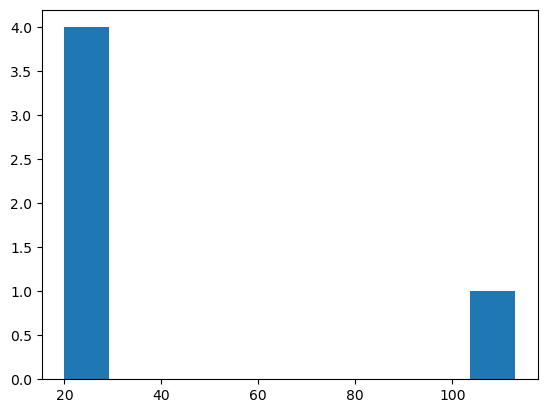

In [26]:
def run_global_simulation():
    global farm
    rewards = []
    for i, snk in enumerate(farm):
        print("SNAKE SAMPLE : ", i)
        rewards.append(run_simulation(snk))
        print("REWARD : ", rewards[i])
        print()
        print()
        print()

    plt.hist(rewards)
    plt.show()

run_global_simulation()

In [27]:
score_weights = np.array([30, 20, 20, 30])
myscores = np.array([
    80 / 200, 
    10 / 20, 
    41 / 70,
    41 / 70
]
)

# score_percentages
# myscores * score_weights
print(score_weights)
print(myscores)
real_score = myscores * score_weights
sum_score = real_score.sum()

print(sum_score)

[30 20 20 30]
[0.4        0.5        0.58571429 0.58571429]
51.28571428571429


In [28]:
# farm[0]._reward
for snk in farm:
    print("reward : ", snk._reward)

reward :  113
reward :  26
reward :  28
reward :  24
reward :  20


In [29]:
def darwin_cleaner():
    global farm

    # new_farm = farm

    new_species = []
    # for i in range(len(farm) - ):



In [30]:
rand_cov = np.random.random()
B = np.array([0, 1, 2, 3, 90])
# bins
A = np.array([1, 3, 5]) 
np.digitize(B, A) # indices

array([0, 1, 1, 2, 3])

In [31]:
shape = (4, 8) # 8 points # 4 inputs
chromosome = np.empty(shape)
chromosome

array([[1.  , 0.  , 0.16, 1.  , 1.  , 0.  , 0.  , 1.  ],
       [1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ],
       [0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  ],
       [1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.75, 1.  ]])

In [32]:
np.empty(4) # without initailzation

array([7.29112900e-304, 7.29290211e-304, 7.74681717e-304, 7.74682413e-304])

In [33]:
chromosome[0]

array([1.  , 0.  , 0.16, 1.  , 1.  , 0.  , 0.  , 1.  ])

In [34]:
chromosome[0] = np.array([_  ** 2 for _ in range(8)])
chromosome

array([[ 0.  ,  1.  ,  4.  ,  9.  , 16.  , 25.  , 36.  , 49.  ],
       [ 1.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ],
       [ 1.  ,  0.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.75,  1.  ]])

In [35]:
np.cumsum(np.arange(11))

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

In [36]:
np.random.uniform(0, 1, size=(2, 5))

array([[0.21382167, 0.57729003, 0.67079029, 0.97110693, 0.4723198 ],
       [0.16263157, 0.45240193, 0.24807018, 0.57647247, 0.88751994]])

In [37]:

def single_point_binary_crossover(parent1: np.ndarray, parent2: np.ndarray, major='r') -> Tuple[np.ndarray, np.ndarray]:
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()

    rows, cols = parent2.shape
    # row = np.random.randint(0, rows)
    # col = np.random.randint(0, cols)
    row = rows // 2
    col = cols // 2

    if major.lower() == 'r':
        offspring1[:row, :] = parent2[:row, :]
        offspring2[:row, :] = parent1[:row, :]

        offspring1[row, :col+1] = parent2[row, :col+1]
        offspring2[row, :col+1] = parent1[row, :col+1]
    elif major.lower() == 'c':
        offspring1[:, :col] = parent2[:, :col]
        offspring2[:, :col] = parent1[:, :col]

        offspring1[:row+1, col] = parent2[:row+1, col]
        offspring2[:row+1, col] = parent1[:row+1, col]

    return offspring1, offspring2

In [38]:
def uniform_binary_crossover(parent1: np.ndarray, parent2: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()
    
    mask = np.random.uniform(0, 1, size=offspring1.shape)
    offspring1[mask > 0.5] = parent2[mask > 0.5]
    offspring2[mask > 0.5] = parent1[mask > 0.5]

    return offspring1, offspring2
    
chromosome = np.arange(20.0).reshape(2, 10)
cms_a = chromosome.copy()
cms_b = chromosome.copy()
# cms_b *= np.random.uniform(0, 0.2, cms_a.shape)
cms_b *= -1
# cms_b *= np.random.uniform(0, 0.2, cms_a.shape)

print(cms_a)
print(cms_b)

# uniform_binary_crossover(
single_point_binary_crossover(
 cms_a, cms_b   
)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]]
[[ -0.  -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9.]
 [-10. -11. -12. -13. -14. -15. -16. -17. -18. -19.]]


(array([[ -0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9.],
        [-10., -11., -12., -13., -14., -15.,  16.,  17.,  18.,  19.]]),
 array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
        [ 10.,  11.,  12.,  13.,  14.,  15., -16., -17., -18., -19.]]))